# **Imization-techniques-deep-learning**

Implementing all the optimizers commonly used in deep learning

Optimizers: ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta”, ‘Nadam']

-> Stochastic Gradient Descent (SGD)

-> Adam

-> RMSprop

-> Adagrad

-> Adadelta

-> Nadam

Training with SGD...
Training with Adam...
Training with RMSprop...
Training with Adagrad...
Training with Adadelta...
Training with Nadam...


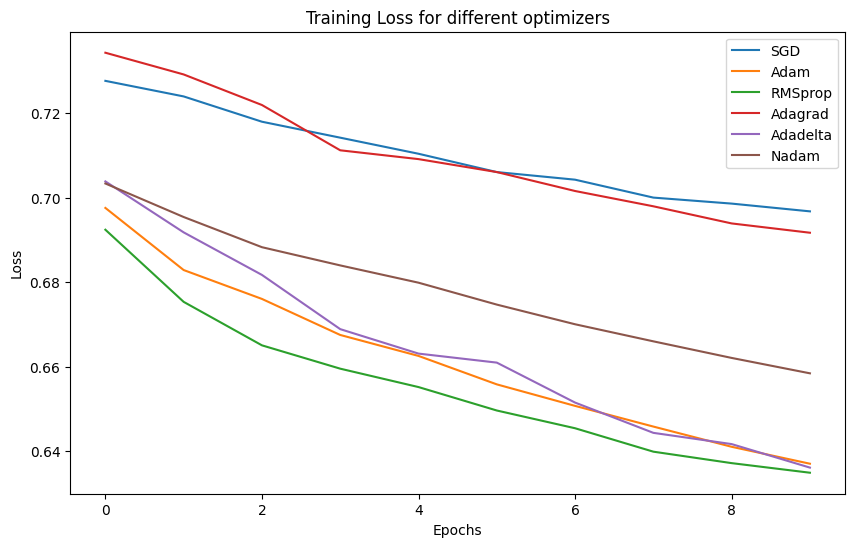

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam

X = np.random.randn(100, 5)
y = np.random.randint(0, 2, size=(100, 1))

def create_model(optimizer):
    model = Sequential()
    model.add(Dense(64, input_dim=5, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

optimizers = [
    SGD(learning_rate=0.01),
    Adam(learning_rate=0.001),
    RMSprop(learning_rate=0.001),
    Adagrad(learning_rate=0.01),
    Adadelta(learning_rate=1.0),
    Nadam(learning_rate=0.001)
]
optimizer_names = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Nadam']
history_dict = {}

for optimizer in optimizers:
    model = create_model(optimizer)
    print(f"Training with {optimizer.__class__.__name__}...")

    history = model.fit(X, y, epochs=10, batch_size=32, verbose=0)
    history_dict[optimizer.__class__.__name__] = history.history['loss']

plt.figure(figsize=(10, 6))

for optimizer_name, loss in history_dict.items():
    plt.plot(loss, label=optimizer_name)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for different optimizers')
plt.legend()
plt.show()


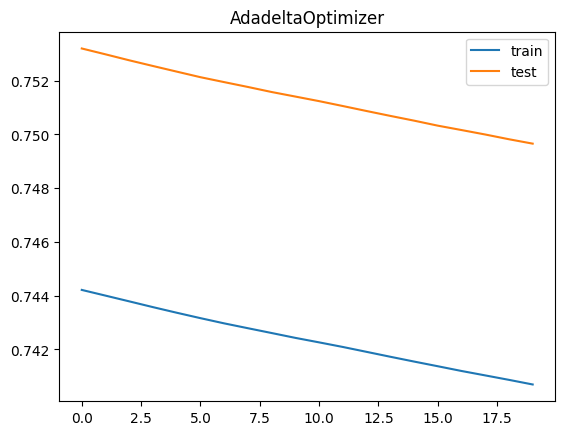

Train Loss                     Train Accuracy
[0.7406096458435059, 0.5027999877929688]
Test Loss                      Test Accuracy
[0.7496553659439087, 0.4936000108718872]



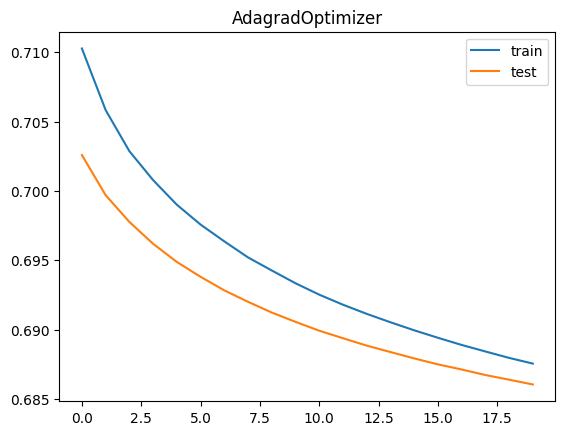

Train Loss                     Train Accuracy
[0.6873120665550232, 0.527999997138977]
Test Loss                      Test Accuracy
[0.6860570907592773, 0.527999997138977]



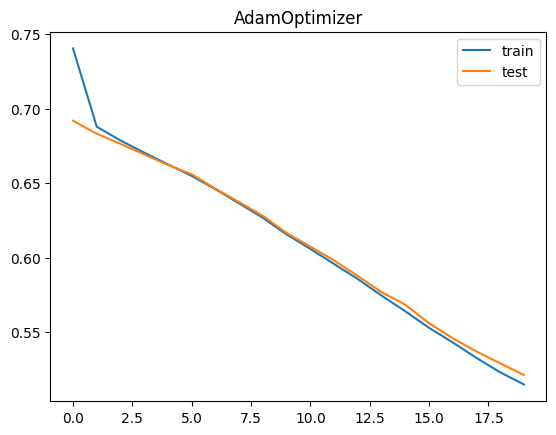

Train Loss                     Train Accuracy
[0.509002685546875, 0.8371999859809875]
Test Loss                      Test Accuracy
[0.5212315917015076, 0.8263999819755554]



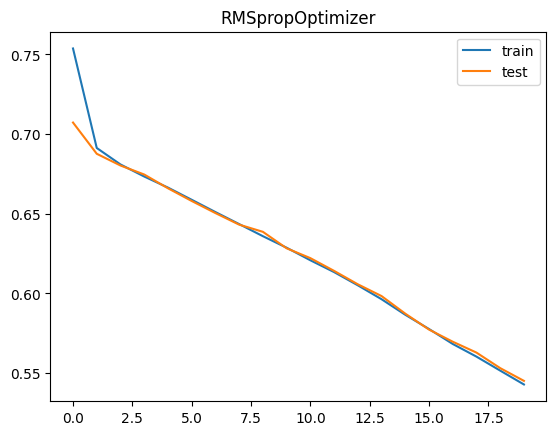

Train Loss                     Train Accuracy
[0.5369864106178284, 0.8320000171661377]
Test Loss                      Test Accuracy
[0.5451775789260864, 0.8256000280380249]



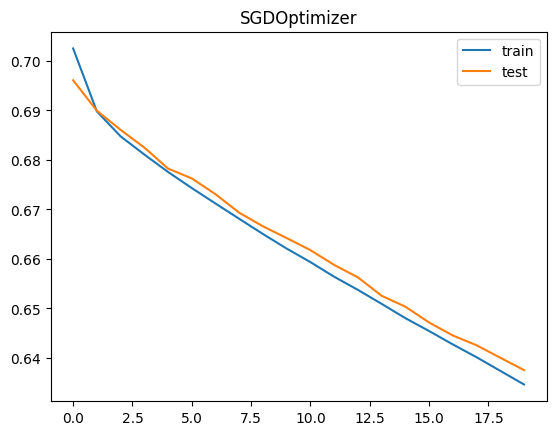

Train Loss                     Train Accuracy
[0.6333324313163757, 0.753600001335144]
Test Loss                      Test Accuracy
[0.6375501155853271, 0.7379999756813049]



In [ ]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

X,y = make_circles(n_samples=5000, noise=0.1, random_state=1)
train1 = 2500
trainX, testX = X[:train1,:],X[train1:,:]
trainy, texty = y[:train1],y[train1:]

def build_model(optimizer):
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

optimizer = ['Adadelta','Adagrad','Adam','RMSprop','SGD','Nadam']

for i in optimizer:
  model = build_model(i)
  history = model.fit(trainX, trainy, validation_data=(testX, texty), epochs=20, verbose=0)
  train_acc = model.evaluate(trainX, trainy, verbose=0)
  test_acc = model.evaluate(testX, texty, verbose=0)
  pyplot.title(i+'Optimizer')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()
  print("Train Loss                     Train Accuracy")
  print(train_acc)
  print("Test Loss                      Test Accuracy")
  print(test_acc)
  print()